# Monte Carlo Simulations 

One of the more interesting use cases of probability distributions is using them to create simulations. With **monte carlo simulations**, we can model real-world phenomena we are interested in with random events following probability distributions. We can see how different variables interact with one another and see what outcomes converge. 

After learning how to extract random values from a normal distribution, we will model a simulation of the Monty Hall problem as well as a customer wait queue. Finally, an exercise will solidify understanding using an elevator weight simulation. 

## Monty Hall Problem 

You may have heard of the Monty Hall Problem, a famous probability problem originally framed on the game show *Let's Make a Deal*. The problem structures a contestant choosing between 3 doors, where 1 has the prize and the other two have goats. 

img

Things get interesting though after the contestant chooses a door. Let's say they choose door #1. The game show host (who knows which door has the prize) opens one of the other doors to reveal a goat. 

img

The contestant is now given the opportunity to switch to the other unopened door. So the question is does the contestant improve their probability by switching or staying? 

> As a bonus exercise, can you use Bayes Theorem to work out whether staying or switching improves probability of winning the prize? 

Back in the 1990's, [a columnist named Marilyn vos Savant](https://priceonomics.com/the-time-everyone-corrected-the-worlds-smartest/) caused quite a stir in the scientific community. She proposed that a contestant doubles their chances by switching, shifting from a probability of $ \frac{1}{3} $ to $ \frac{2}{3} $. The mathematics and scientific community adamantly, publicly, and viciously told her she was wrong. However, she was proven right.

img

We could use Bayes Theorem to prove Marilyn is correct, and I encouraged doing that exercise! However, I want to focus on Monte Carlo simulations as a vehicle for this kind of discovery. With our "Monte Carlo Monty Hall" simulation, we will show empirical evidence that switching indeed doubles the contestant's chance of winning. 

The Python code below will generate 10,000 random Monty Hall games (specified by the `trial_count`). On each game, it will randomly select the prize door and the contestant's selected door. The opened door will be the door that was not selected nor has the prize. The switch door will be the door that was not selected nor was opened. We will keep track of how often wins will occur by staying versus switching. 

In [9]:
from random import randint, choice

def random_door(): return randint(1, 3)

trial_count = 10000

stay_wins = 0
switch_wins = 0

for i in range(0, trial_count):
    prize_door = random_door()
    selected_door = random_door()
    opened_door = choice([d for d in range(1, 4) if d != selected_door and d != prize_door])
    switch_door = choice([d for d in range(1, 4) if d != selected_door and d != opened_door])

    if selected_door == prize_door:
        stay_wins += 1

    if switch_door == prize_door:
        switch_wins += 1

print("STAY WINS: {}, SWITCH WINS: {}".format(
    stay_wins, switch_wins))

print("STAY WIN RATE: {}, SWITCH WIN RATE: {}".format(
    float(stay_wins)/float(trial_count), float(switch_wins)/float(trial_count)))

STAY WINS: 3364, SWITCH WINS: 6636
STAY WIN RATE: 0.3364, SWITCH WIN RATE: 0.6636


Interesting. If you run this simulation over and over again, you will consistently see about $ 1/3 $ of the outcomes win by staying, but $ 2/3 $ of the outcomes win by switching. This is pretty compelling evidence that Marilyn is correct. After all, we can make the argument the Monty Hall game is (if fair) completely random. Therefore this was pretty easy to model on a computer. 

But why do we care? Games are one thing and are easily modeled. But what about real life problems? While models and simulations are far from perfect for more complex real-world problems, they can be useful. Let's first learn how to generate continuous random values first, from a continuous probability distribution. 

## Generating Values from Distributions

To do more with Monte Carlo simulations, we will need to learn how to generate random values from specific probability distributions. With just our knowledge from previous sections, you can actually generate random values using a percent point function (PPF) and a randomly generated value between 0 and 1. By generating random probability values between 0 and 1, we can look up that value from a probability distribution's PPF and get random values that follow that distribution. 

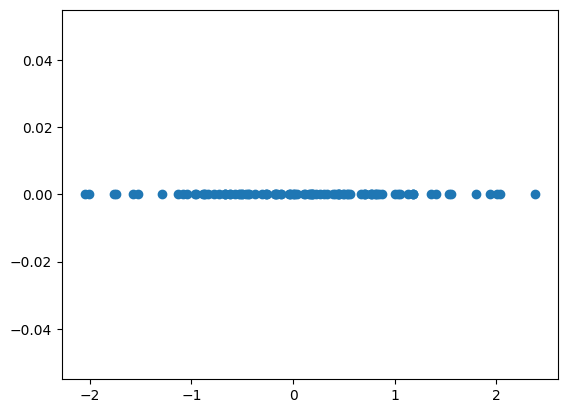

In [10]:
from scipy.stats import norm
import random
import matplotlib.pyplot as plt

mean, std = 0, 1

X = []
for i in range(100):
    # random value between 0 and 1
    random_p = random.random()

    # look up that that random probability in normal PPF
    random_x = norm.ppf(random_p, mean, std)
    
    X.append(random_x)

plt.plot(X, [0 for _ in X], 'o') # use a scatterplot to make numberline 

The easiest way to generate random values from any distribution is to use NumPy instead of SciPy, using the distributions in the random package. Below we randomly generate 10 values from the normal distribution, where `loc` is the mean and `scale` is the standard deviation. We will get a vector of values that follow that normal distribution. 

[-0.46627617 -1.43467388 -1.23237799  0.35985219  0.16877851  0.568366
 -0.87087555 -0.75743649  0.431412    0.57757389  0.189202    0.91865965
 -1.17322903  1.40048617 -0.56067107 -0.26284855 -0.61017476  1.17838388
  0.18683653 -1.21011097  2.01376081  1.83408375 -0.00978769 -1.06940502
  1.49693794  0.67868926 -0.78166157 -0.68239963  1.27456109 -1.03939407
 -0.72190202  0.14954888 -0.38173656  1.40596017  0.36427794  1.90055144
 -0.59002485  0.78487752 -1.12743779 -2.28493253 -0.98444995 -2.09300001
  0.75239575 -1.79166412  0.38085763  2.50194162  0.3018827   1.22646561
  0.24582356 -0.5494599   0.07341619 -0.98751876 -0.24162732  2.28892518
  0.79532381  0.73604075 -0.75482199 -0.91997276 -0.4103328   0.0133743
  0.00894104 -2.08252449  0.43974615  0.94418534  0.29008841 -0.568509
  0.23000277  1.01684961 -0.49682585 -0.476234   -0.25919585  0.28315444
  0.40116932 -0.86349426 -0.60663515  0.9144487  -0.94031198  0.34252698
  0.90722646 -1.07607464 -1.03714869  0.65521965 -0.7449

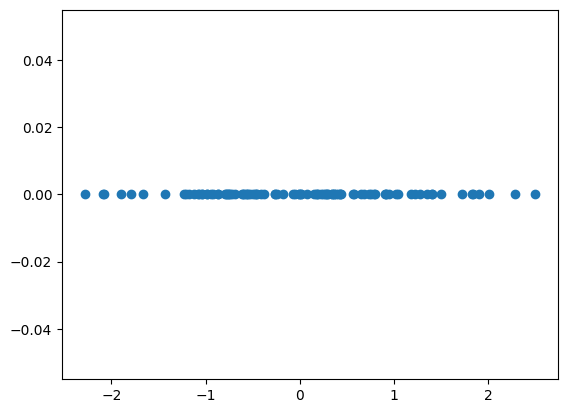

In [11]:
import numpy as np 
import matplotlib.pyplot as plt

X = np.random.normal(loc=0, scale=1, size=100)

print(X)
plt.plot(X, [0 for _ in X], 'o') # use a scatterplot to make numberline 
plt.show()

We will use NumPy for the rest of this section to generate random values for a desired probability distribution. Next let's see a useful case for this operation. 

## Customer Queue Simulation

Whether you are at Disneyland or the grocery store, nobody likes waiting in line. As a matter of fact, this area of operations research is so prevalent it even has its own name. [Queuing Theory](https://en.wikipedia.org/wiki/Queueing_theory) is all about studying how to optimize people waiting in line. Many companies have studied, optimized, and [perhaps overengineered](https://www.youtube.com/watch?v=9yjZpBq1XBE) how people wait in line and shorten their wait time. It is also a complicated but well-structured problem that can benefit from Monte Carlo simulations.


img

In this example, we are going to simulate customers walking into a bank, grocery store, etc. where they are processed one-a-time. To keep things simple we will only have a single clerk to process each customer, although you are free to adapt this to account for multiple clerks. The purpose of this simulation is to see whether a line will form and get out-of-hand, and we could theoretically use this to predict average wait times of customers. 

Before we proceed, ask yourself this: **what two probability distributions make sense for this problem? We studied them! Think and then move on.** 

|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
v 

If you contemplate this long enough, recall we studied many probability distributions. The normal distribution might make sense for the customer processing time, assuming the processing time follows a normal distribution. But what about the flow of customers into the store? The Poisson Distribution might tempt you because it predicts `k` customers in a given time interval. But those customers would arrive in chunks simultaneously, when in fact they do arrive at unique times within that interval. Therefore, the exponential distribution will make more sense because it models how much time lapses between each customer walking in. 

Let's build the simulation below using the normal distribution and exponential distribution. The customers will take on average 3 minutes to process with a standard deviation of .5 minutes. We will model 20 customers on average arriving every hour, but to be consistent in minutes that is $ 1/3 $ of a customer every minute. We will run the simulation for the first 100 customers. 

Note this is a little involved but the idea is we are using these two distributions to create a "realistic" simulation. Run the simulation and observe its output before you dive into the code itself. 

In [14]:
import numpy as np
from numpy.random import normal, exponential

np.random.seed(0) # use random seed to run identical "random" simulations

mean_checkout_time = 3  # minutes
std_checkout_time = .5  # minutes
mean_arrival_rate = 20 / 60  # customers per minute
customer_ct = 100

# customer arrival times relative to the previous customer
customer_time_betweens = exponential(scale=1/mean_arrival_rate, size=customer_ct+2) # need to add 2 to prevent out-of-index errors

# customer arrival times as minutes since start of simulation
customer_arrival_times = np.cumsum(customer_time_betweens)

# customer checkout times
customer_checkout_times = normal(loc=mean_checkout_time, scale=std_checkout_time, size=customer_ct+2) # need to add 2 to prevent out-of-index errors

# start time at 0 but jump to first customer arrival, and track whether customer is being processed
# and which customers are waiting
current_time = customer_arrival_times[0]
waiting_customers = []

arrived_customer_i = 0
processing_customer_i = 0
processing_customer_start_time = customer_arrival_times[0]

# process customers but stop when all customers have arrived 
while arrived_customer_i < customer_ct:

    # arrival time of processing customer
    processing_cust_arr_tm = customer_arrival_times[processing_customer_i]

    # scheduled finish time of processing customer
    processing_cust_fin_tm = processing_customer_start_time + \
                             customer_checkout_times[processing_customer_i]

    # time of next customer arrival
    def next_cust_arr_tm(): return customer_arrival_times[arrived_customer_i+1]

    # CHECK WHICH EVENT OCCURRED BY MATCHING THE TIMES
    next_event_time = None

    # if the first customer
    if current_time == processing_customer_start_time:
        print(f"{current_time}: CUSTOMER {arrived_customer_i} ARRIVED, NO LINE, PROCESSING IMMEDIATELY")
        next_event_time = np.min([processing_cust_fin_tm, next_cust_arr_tm()])

    # if a customer arrives
    elif current_time == next_cust_arr_tm():
        arrived_customer_i +=1 # increment the arrived customer index

        # if there is no queue and the arriving customer is next
        if processing_customer_i == arrived_customer_i:
            processing_customer_start_time = current_time
            processing_cust_fin_tm = processing_customer_start_time + customer_checkout_times[processing_customer_i]

            print(f"{current_time}: CUSTOMER {arrived_customer_i} ARRIVED, NO LINE, PROCESSING IMMEDIATELY")
        # else there is a queue and the customer must wait in line
        else:
            waiting_customers.append(arrived_customer_i)
            print(f"{current_time}: CUSTOMER {arrived_customer_i} ARRIVED, ADDING TO LINE {waiting_customers}")

        # schedule next event time to be the processing customer finishing or the next customer arrival
        next_event_time = np.min([processing_cust_fin_tm, next_cust_arr_tm()])

    # if a customer finishes processing
    elif current_time == processing_cust_fin_tm:

        # if queue is not empty, take customer out of queue
        if waiting_customers:
            waiting_customers.pop(0)
            print(f"{current_time}: CUSTOMER {processing_customer_i} FINISHED, CUSTOMER {processing_customer_i + 1}"
                  f" REMOVED FROM LINE {waiting_customers}")

            processing_customer_start_time = current_time

            # next event is this customer finishing or the next customer arrival
            next_event_time = np.min([processing_customer_start_time + customer_checkout_times[processing_customer_i +1],
                                      next_cust_arr_tm()])

        else:
            # if the queue is empty, wait for next customer 
            print(f"{current_time}: CUSTOMER {processing_customer_i} FINISHED, WAITING FOR CUSTOMER {processing_customer_i+1}")
            next_event_time = next_cust_arr_tm()

        processing_customer_i += 1 # process next customer

    # move forward to next event
    current_time = next_event_time

2.38762352448933: CUSTOMER 0 ARRIVED, NO LINE, PROCESSING IMMEDIATELY
5.62045474435456: CUSTOMER 0 FINISHED, WAITING FOR CUSTOMER 1
6.155415813386844: CUSTOMER 1 ARRIVED, NO LINE, PROCESSING IMMEDIATELY
8.387293970248232: CUSTOMER 1 FINISHED, WAITING FOR CUSTOMER 2
8.92508525079905: CUSTOMER 2 ARRIVED, NO LINE, PROCESSING IMMEDIATELY
11.286688707750862: CUSTOMER 3 ARRIVED, ADDING TO LINE [3]
12.66921134769685: CUSTOMER 2 FINISHED, CUSTOMER 3 REMOVED FROM LINE []
12.93983418103736: CUSTOMER 4 ARRIVED, ADDING TO LINE [4]
16.05431206586819: CUSTOMER 5 ARRIVED, ADDING TO LINE [4, 5]
16.61715593571214: CUSTOMER 3 FINISHED, CUSTOMER 4 REMOVED FROM LINE [5]
17.78086966337411: CUSTOMER 6 ARRIVED, ADDING TO LINE [5, 6]
20.206545721291967: CUSTOMER 4 FINISHED, CUSTOMER 5 REMOVED FROM LINE [6]
23.11658330338579: CUSTOMER 5 FINISHED, CUSTOMER 6 REMOVED FROM LINE []
24.45144290247208: CUSTOMER 7 ARRIVED, ADDING TO LINE [7]
25.58120699263052: CUSTOMER 6 FINISHED, CUSTOMER 7 REMOVED FROM LINE []
29.1

When you run the simulation above, you will see a line does irrecoverably build up after enough time has passed. This should tell you another teller might be necessary to process customers! You can also experiment with shorter processing times or longer times in-between customers, and you will find there is an ideal balance at some point where the processing keeps up with the queue. 

Of course, we can only capture so much in a simulation. The real-world is chaotic and ever-changing, even within the same day! The rates we assumed in our model might be accurate for the first few business hours, but then the lunch crowd rushes in and the underlying model completely changes. Sometimes a single customer can come in and practically filibusters the teller about their day, and this deviates from what our model assumes. The fact a simulation can only capture so much of reality is what we call the **simulation-to-reality gap**. As a famous statistician once said, "all models are wrong, some are useful." Some models, like FAA-approved flight simulations, are very useful and impressive. But other models like the one we built can give us insights, but it's still a tad naive to the nature of transience.

## Exercise

A building owner wants to install a new elevator, but he wants to make sure the weight limit being reached is an unlikely occurence. A simululation is run to test the maximum number of passengers allowed on an elevator and how often the maximum weight of 2100 pounds will be breached. It is believed anywhere from 1-15 passengers are equally likely on any elevator trip, and the mean weight of a passenger is 172 lbs and the standard deviation is 18 pounds.

Complete the code below to run 1000 simulations, and determine if a 15 passenger allowance can result in breaches of the 2100 lb limit. 

In [ ]:
from numpy.random import normal, randint

mean, std = 172, 18
trial_ct = 1000

weight_limit = 2100
max_number_passengers = 15

infractions = 0
for i in range(trial_ct):

    # generates 0 or 1 for each possible passenger
    # 1 if that passenger shows up, 0 if they do not 
    passenger_shows = randint(low=0, high=2, size=max_number_passengers)

    # generates a random weight for a passenger
    passenger_weights = normal(?, ?, ?)

    # multiplies and sums the passenger weights
    total_weight = sum(passenger_shows * ?)

    if ? > weight_limit:
        infractions += 1


print(f"{infractions}/{trial_ct} infractions")


### SCROLL DOWN FOR ANSWER
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
v 

In [26]:
from numpy.random import normal, randint

mean, std = 172, 18
trial_ct = 1000

weight_limit = 2100
max_number_passengers = 15

infractions = 0
for i in range(trial_ct):

    # generates 0 or 1 for each possible passenger
    # 1 if that passenger shows up, 0 if they do not 
    passenger_shows = randint(low=0, high=2, size=max_number_passengers)

    # generates a random weight for a passenger
    passenger_weights = normal(mean, std, max_number_passengers)

    # multiplies and sums the passenger weights
    total_weight = sum(passenger_shows * passenger_weights)

    if total_weight > weight_limit:
        infractions += 1

print(f"{infractions}/{trial_ct} infractions")

11/1000 infractions
